In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("visit_data.csv")

In [3]:
df.head()

,id,first_name,last_name,email,gender,ip_address,visit
0,1,Sonny,Dahl,sdahl0@mysql.com,Male,135.36.96.183,1225.0
1,2,NaN,NaN,dhoovart1@hud.gov,NaN,237.165.194.143,919.0
2,3,Gar,Armal,garmal2@technorati.com,NaN,166.43.137.224,271.0
3,4,Chiarra,Nulty,cnulty3@newyorker.com,NaN,139.98.137.108,1002.0
4,5,NaN,NaN,sleaver4@elegantthemes.com,NaN,46.117.117.27,2434.0


As we can see that there are data where some values are missing and if we exmine we will see some outliers

In [4]:
print("First name is duplictaed - {}".format(any(df.first_name.duplicated())))
print("Last name is duplictaed - {}".format(any(df.last_name.duplicated())))
print("Email is duplictaed - {}".format(any(df.email.duplicated())))

First name is duplictaed - True
Last name is duplictaed - True
Email is duplictaed - False


There are duplicates in both First and Last names. Which is normal. However, as we can see, there is no duplicate in email

In [5]:
print(f"The column Email contains NaN - {df.email.isnull().values.any()}")
print(f"The column IP Address contains NaN - {df.ip_address.isnull().values.any()}")
print(f"The column Visit contains NaN - {df.visit.isnull().values.any()}")

The column Email contains NaN - False
The column IP Address contains NaN - False
The column Visit contains NaN - True


In [6]:
size_prev = df.shape
df = df[np.isfinite(df['visit'])]
size_after = df.shape

In [7]:
print(f"The size of previous data was - {size_prev[0]} rows and the size of the new one is - {size_after[0]} rows")

The size of previous data was - 1000 rows and the size of the new one is - 974 rows


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd8597988e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd859798f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd859798490>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd8500df6a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd8500dfa30>],
 'means': []}

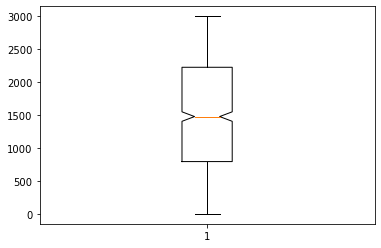

In [8]:
plt.boxplot(df.visit, notch=True)

In [9]:
df1 = df[(df['visit'] <= 2900) & (df['visit'] >= 100)]
print("After removing outliers the new size of the data is - {}".format(*df1.shape))

After removing outliers the new size of the data is - 923


### SQL Lite database operations

In [10]:
import sqlite3
conn = sqlite3.connect('samplesqlitedb.db')
c = conn.cursor()
c.execute('''DROP TABLE People''')
c.execute('''CREATE TABLE People(Name VARCHAR(255),
    Address VARCHAR(255),
    City VARCHAR(255),
    State VARCHAR (255),
    Zip integer,
    Phone_Number integer)''')
conn.commit()

In [11]:
conn = sqlite3.connect('samplesqlitedb.db')
c = conn.cursor()
records=[('Pradeep', '11009 R PLZ', 'Omaha','NE',68137,1023456781),
('Nava', '13600 Pyrite Dr', 'Austin','TX',78729,1032345672),
('Madhu', '1110 W Russel ST', 'Peoria','IL',61606,1032345697),
('Vamshi', '1110 W Russel ST', 'Peoria','IL',61606,1032345648),
('Biden', '1600 Pennsylvania Avenue', 'Washington','DC',20500,1111111111),
('Hopper', 'XYZ Street', 'Newyork','NY',10328,1032345650),
('Tesla', 'ABC ST', 'Chicago','IL',61429,1020306070),
('Romeo', 'DEF ST', 'Paris','NV',92165,1041432067),
('Ben', '1111 Rodeo ST', 'Dallas','TX',75055,1100033345),
('Greg', '1 Nowhere ST', 'Miami','FL',32012,2340001234)]
c.executemany('INSERT INTO People VALUES(?,?,?,?,?,?)',records)
conn.commit()

In [12]:
c.execute('''SELECT * FROM People;''')
rows = c.fetchall() 
for row in rows:
    print(row)
    conn.close()

('Pradeep', '11009 R PLZ', 'Omaha', 'NE', 68137, 1023456781)
('Nava', '13600 Pyrite Dr', 'Austin', 'TX', 78729, 1032345672)
('Madhu', '1110 W Russel ST', 'Peoria', 'IL', 61606, 1032345697)
('Vamshi', '1110 W Russel ST', 'Peoria', 'IL', 61606, 1032345648)
('Biden', '1600 Pennsylvania Avenue', 'Washington', 'DC', 20500, 1111111111)
('Hopper', 'XYZ Street', 'Newyork', 'NY', 10328, 1032345650)
('Tesla', 'ABC ST', 'Chicago', 'IL', 61429, 1020306070)
('Romeo', 'DEF ST', 'Paris', 'NV', 92165, 1041432067)
('Ben', '1111 Rodeo ST', 'Dallas', 'TX', 75055, 1100033345)
('Greg', '1 Nowhere ST', 'Miami', 'FL', 32012, 2340001234)
